# Module 13 Assignment
by Niharika Madhadi

### Overview
We will scraping the web to create a dataset for this assignment

##Part 1 - Scrape the Data

In [ ]:
import pandas as pd

first_class = pd.read_html('https://en.wikipedia.org/wiki/Passengers_of_the_Titanic',header=0)[1]
first_class['pclass']=1
first_class.columns=first_class.columns.str.strip().str.lower()
print(first_class.shape)
first_class.head()

(326, 8)


,name,age,hometown,boarded,destination,lifeboat,body,pclass
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1


In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

soup=BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Passengers_of_the_Titanic").text)
s=soup.select_one('table:nth-of-type(2)').find_all('tr',{'style':'background:#9bddff;'})
s_list=[x.text.split('\n')[1] for x in s]
s_series=pd.Series(s_list)
first_class_survivors=s_series.to_frame()
first_class_survivors.columns=['survivors']
first_class_survivors.head()

,survivors
0,"Allen, Miss Elizabeth Walton"
1,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]"
2,"and maid, Miss Sarah Daniels"
3,"Allison, Master Hudson Trevor"
4,"and nurse, Miss Alice Catherine Cleaver"


In [ ]:
soup=BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Passengers_of_the_Titanic").text)
rows=soup.select_one('table:nth-of-type(2)').find_all('tr')
psurvived=[]
for row in rows[1:]:
  cells=row.find_all('td')
  pname=cells[0].get_text()
  if row.has_attr('style'):
    psurvived.append((pname,1))
  else :
    psurvived.append((pname,0))

survived=pd.DataFrame(psurvived,columns=['name','survived'])
pfirst_class=pd.merge(first_class,survived,on='name')
pfirst_class.head()

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0


In [ ]:
import pandas as pd

second_class = pd.read_html('https://en.wikipedia.org/wiki/Passengers_of_the_Titanic',header=0)[2]
second_class['pclass']=2
second_class.columns=second_class.columns.str.strip().str.lower()
print(second_class.shape)
second_class.head()

(278, 8)


,name,age,hometown,boarded,destination,lifeboat,body,pclass
0,"Abelson, Mr. Samuel",30,Russia,Cherbourg,"New York, New York, US",NaN,NaN,2
1,"Abelson, Mrs. Anna (née Wizosky?)",28,Russia,Cherbourg,"New York, New York, US",10,NaN,2
2,"Andrew, Mr. Edgar Samuel",17,"San Ambrosio, Córdoba, Argentina",Southampton,"Trenton, New Jersey, US",NaN,NaN,2
3,"Andrew, Mr. Frank Thomas",30,"Redruth, Cornwall, England",Southampton,"Houghton, Michigan, US",NaN,NaN,2
4,"Angle, Mr. William A.",32,"Warwick, Warwickshire, England",Southampton,New York City,NaN,NaN,2


In [ ]:
soup=BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Passengers_of_the_Titanic").text)
rows=soup.select_one('table:nth-of-type(3)').find_all('tr')
psurvived=[]
for row in rows[1:]:
  cells=row.find_all('td')
  pname=cells[0].get_text()
  if row.has_attr('style'):
    psurvived.append((pname,1))
  else :
    psurvived.append((pname,0))

survived=pd.DataFrame(psurvived,columns=['name','survived'])
psecond_class=pd.merge(second_class,survived,on='name')
psecond_class.head()

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived
0,"Abelson, Mr. Samuel",30,Russia,Cherbourg,"New York, New York, US",NaN,NaN,2,0
1,"Abelson, Mrs. Anna (née Wizosky?)",28,Russia,Cherbourg,"New York, New York, US",10,NaN,2,1
2,"Andrew, Mr. Edgar Samuel",17,"San Ambrosio, Córdoba, Argentina",Southampton,"Trenton, New Jersey, US",NaN,NaN,2,0
3,"Andrew, Mr. Frank Thomas",30,"Redruth, Cornwall, England",Southampton,"Houghton, Michigan, US",NaN,NaN,2,0
4,"Angle, Mr. William A.",32,"Warwick, Warwickshire, England",Southampton,New York City,NaN,NaN,2,0


In [ ]:
import pandas as pd

third_class = pd.read_html('https://en.wikipedia.org/wiki/Passengers_of_the_Titanic',header=0)[3]
third_class['pclass']=3
third_class.columns=third_class.columns.str.strip().str.lower()
print(third_class.shape)
third_class.head()

(708, 9)


,name,age,hometown,home country,boarded,destination,lifeboat,body,pclass
0,"Abbing, Mr. Anthony",40,"Cincinnati, Ohio",US,Southampton,"Cincinnati, Ohio, US",NaN,NaN,3
1,"Abbott, Mrs. Rhoda Mary (née Hunt)",39,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",A,NaN,3
2,"Abbott, Mr. Rossmore Edward",16,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,190MB,3
3,"Abbott, Mr. Eugene Joseph",14,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,NaN,3
4,"Abd al-Khaliq, Mr. Farid Qasim Husayn",18,Shana,Syria,Cherbourg,New York City,NaN,NaN,3


In [ ]:
soup=BeautifulSoup(requests.get("https://en.wikipedia.org/wiki/Passengers_of_the_Titanic").text)
rows=soup.select_one('table:nth-of-type(4)').find_all('tr')
psurvived=[]
for row in rows[1:]:
  cells=row.find_all('td')
  pname=cells[0].get_text()
  if row.has_attr('style'):
    psurvived.append((pname,1))
  else :
    psurvived.append((pname,0))

survived=pd.DataFrame(psurvived,columns=['name','survived'])
pthird_class=pd.merge(third_class,survived,on='name')
pthird_class.head()

,name,age,hometown,home country,boarded,destination,lifeboat,body,pclass,survived
0,"Abbing, Mr. Anthony",40,"Cincinnati, Ohio",US,Southampton,"Cincinnati, Ohio, US",NaN,NaN,3,0
1,"Abbott, Mrs. Rhoda Mary (née Hunt)",39,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",A,NaN,3,1
2,"Abbott, Mr. Rossmore Edward",16,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,190MB,3,0
3,"Abbott, Mr. Eugene Joseph",14,"East Providence, Rhode Island",US,Southampton,"East Providence, Rhode Island, US",NaN,NaN,3,0
4,"Abd al-Khaliq, Mr. Farid Qasim Husayn",18,Shana,Syria,Cherbourg,New York City,NaN,NaN,3,0


In [ ]:
# concat three dataframes

passengers=pd.concat([pfirst_class,psecond_class,pthird_class],ignore_index=True)
print(passengers.shape)
print(passengers.info())
passengers.head()

(1294, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1294 non-null   object
 1   age           1294 non-null   object
 2   hometown      1257 non-null   object
 3   boarded       1291 non-null   object
 4   destination   1293 non-null   object
 5   lifeboat      495 non-null    object
 6   body          133 non-null    object
 7   pclass        1294 non-null   int64 
 8   survived      1294 non-null   int64 
 9   home country  695 non-null    object
dtypes: int64(2), object(8)
memory usage: 101.2+ KB
None


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN


In [ ]:
# passengers.to_csv('titanic_project.csv',index=False)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd /content

# %cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

/content


## Part 2 - Adding the Gender Feature Using Regular Expressions

The purpose of this part is to add the gender feature

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks

%cp titanic_project.csv /content

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd

passengers=pd.read_csv('titanic_project.csv')
print(passengers.shape)
print(passengers.info())
passengers.head()

(1294, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1294 non-null   object
 1   age           1294 non-null   object
 2   hometown      1257 non-null   object
 3   boarded       1291 non-null   object
 4   destination   1293 non-null   object
 5   lifeboat      495 non-null    object
 6   body          133 non-null    object
 7   pclass        1294 non-null   int64 
 8   survived      1294 non-null   int64 
 9   home country  695 non-null    object
dtypes: int64(2), object(8)
memory usage: 101.2+ KB
None


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN


In [ ]:
# extracting surnames and titles

surnames=passengers.name.str.extract(r'(?P<surname>.*), (?P<title>[^\s]+) (?P<fmname>.*)')
passengers=pd.concat([passengers,surnames],axis=1)
passengers.head()

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN,Allen,Miss,Elizabeth Walton
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN,Allison,Mr.,Hudson Creighton
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN,and chauffeur,Mr.,George Swane[71]
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]"
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels)


In [ ]:

print(passengers['title'].value_counts(dropna=False))
female=['Miss', 'Mrs.', 'Doña', 'Countess', 'Lady']
male=['Mr.', 'Mr', 'Captain', 'Sir', 'Don', 'Major', 'The', 'Reverend', 'Father', 'Colonel', 'Major', 'Don', 'Master', 'Dr.']

Mr.         753
Miss        261
Mrs.        190
Master       58
Dr.           8
Colonel       5
Father        4
Reverend      3
The           2
Major         2
NaN           1
Don           1
Lady          1
Doña          1
Countess      1
Sir           1
Captain       1
Mr            1
Name: title, dtype: int64


In [ ]:
passengers.loc[passengers.title == 'Major']

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname
45,"Butt, Major Archibald Willingham",46,"Washington, D.C., US",Southampton,"Washington, D.C., US",NaN,NaN,1,0,NaN,Butt,Major,Archibald Willingham
228,"Peuchen, Major Arthur Godfrey",52,"Toronto, Ontario, Canada",Southampton,"Toronto, Ontario, Canada",6,NaN,1,1,NaN,Peuchen,Major,Arthur Godfrey


In [ ]:
def set_sex(row):
  if row.title in female:
    return 'female'
  elif row.title in male:
    return 'male'
  else :
    return 'unknown'

passengers['sex']=passengers.apply(set_sex,axis=1)
print(passengers['sex'].value_counts())

male       839
female     454
unknown      1
Name: sex, dtype: int64


In [ ]:
passengers.loc[passengers.sex=='unknown']

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
337,Beane. Mrs. Ethel (née Clarke),19,"Norwich, Norfolk, England",Southampton,New York City,13,NaN,2,1,NaN,NaN,NaN,NaN,unknown


In [ ]:
passengers.loc[337,'sex']='female'
print(passengers['sex'].value_counts())
passengers.head()

male      839
female    455
Name: sex, dtype: int64


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN,Allen,Miss,Elizabeth Walton,female
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN,Allison,Mr.,Hudson Creighton,male
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN,and chauffeur,Mr.,George Swane[71],male
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",female
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),female


In [ ]:
# %cd /content
# passengers.to_csv('titanic_project.csv',index=False)

/content


In [ ]:
# %cd /content

# %cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

/content


## Part 3 - Data Prep and Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks
%cp titanic_project.csv /content

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd

passengers=pd.read_csv('titanic_project.csv')
print(passengers.shape)
print(passengers.info())
passengers.head()

(1294, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1294 non-null   object
 1   age           1294 non-null   object
 2   hometown      1257 non-null   object
 3   boarded       1291 non-null   object
 4   destination   1293 non-null   object
 5   lifeboat      495 non-null    object
 6   body          133 non-null    object
 7   pclass        1294 non-null   int64 
 8   survived      1294 non-null   int64 
 9   home country  695 non-null    object
 10  surname       1293 non-null   object
 11  title         1293 non-null   object
 12  fmname        1293 non-null   object
 13  sex           1294 non-null   object
dtypes: int64(2), object(12)
memory usage: 141.7+ KB
None


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
0,"Allen, Miss Elizabeth Walton",29,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN,Allen,Miss,Elizabeth Walton,female
1,"Allison, Mr. Hudson Creighton",30,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN,Allison,Mr.,Hudson Creighton,male
2,"and chauffeur, Mr. George Swane[71]",19,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN,and chauffeur,Mr.,George Swane[71],male
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",female
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),female


In [ ]:
#identifying missing values

passengers.isnull().sum()

name               0
age                0
hometown          37
boarded            3
destination        1
lifeboat         799
body            1161
pclass             0
survived           0
home country     599
surname            1
title              1
fmname             1
sex                0
dtype: int64

In [ ]:
#find missing destination values

passengers[passengers.destination.isnull()]

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
710,"Celotti, Mr. Francesco",24,Milan[97],Southampton,NaN,NaN,NaN,3,0,Italy,Celotti,Mr.,Francesco,male


In [ ]:
#replace missing destination with New York
passengers.iloc[710,passengers.columns.get_loc('destination')]='New York'

In [ ]:
#missing boarding values

passengers[passengers.boarded.isnull()]

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
406,"Faunthorpe, Mr. Harry Bartram",40,"Liverpool, Merseyside, England, UK",NaN,"Philadelphia, Pennsylvania, US",NaN,286MB,2,0,NaN,Faunthorpe,Mr.,Harry Bartram,male
407,"Fillbrook, Mr. Joseph Charles",18,"Truro, Cornwall, England, UK",NaN,"Houghton, Michigan, US",NaN,NaN,2,0,NaN,Fillbrook,Mr.,Joseph Charles,male
408,"Fox, Mr. Stanley Hubert",38,"Rochester, New York, US",NaN,"Rochester, New York, US",NaN,236MB,2,0,NaN,Fox,Mr.,Stanley Hubert,male


In [ ]:
#replace missing boarded values
passengers.loc[406,'boarded']='Southampton'
passengers.loc[407,'boarded']='Southampton'
passengers.loc[408,'boarded']='Southampton'
passengers.isnull().sum()

name               0
age                0
hometown          37
boarded            0
destination        0
lifeboat         799
body            1161
pclass             0
survived           0
home country     599
surname            1
title              1
fmname             1
sex                0
dtype: int64

In [ ]:
temp=passengers[~passengers.age.apply(lambda x: x.isalnum())]
print(len(temp))
temp.head(12)

12


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex
7,"Allison, Master Hudson Trevor",11 mo.,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,Allison,Master,Hudson Trevor,male
363,"Caldwell, Master Alden Gates",10 mo.,"Bangkok, Siam[note 6]",Southampton,"Roseville, Illinois, US",13,NaN,2,1,NaN,Caldwell,Master,Alden Gates,male
547,"Richards, Master Sibley George",9 mo.,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",4,NaN,2,1,NaN,Richards,Master,Sibley George,male
590,"West, Miss Barbara Joyce",10 mo.,"Bournemouth, Dorset, England",Southampton,"Gainesville, Florida, US",10,NaN,2,1,NaN,West,Miss,Barbara Joyce,female
612,"Aks, Master Frank Philip",10 mo.,London,Southampton,"Norfolk, Virginia, US",11,NaN,3,1,England,Aks,Master,Frank Philip,male
663,"Baqlini, Miss Hileni Barbarah",9 mo.,NaN,Cherbourg,"Brooklyn, New York, US",C,NaN,3,1,Syria,Baqlini,Miss,Hileni Barbarah,female
749,"Danbom, Master Gilbert Sigvard Emanuel",4 mo.,NaN,Southampton,"Stanton, Iowa, US",NaN,NaN,3,0,Sweden,Danbom,Master,Gilbert Sigvard Emanuel,male
765,"Dean, Miss Elizabeth Gladys ""Millvina""",2 mo.,"Bartley Farm, Hampshire",Southampton,"Wichita, Kansas, US",10,NaN,3,1,England,Dean,Miss,"Elizabeth Gladys ""Millvina""",female
815,"Gheorgheff, Mr. Stanio",–,Unknown,Cherbourg,"Butte, Montana, US",NaN,NaN,3,0,Bulgaria,Gheorgheff,Mr.,Stanio,male
939,"Kraeff, Mr. Theodor",–,Vetren,Cherbourg,"Madison, Wisconsin, US",NaN,NaN,3,0,Bulgaria,Kraeff,Mr.,Theodor,male


In [ ]:
# fix the age column to numeric
import numpy as np

def fix_age(row):
  if 'mo.' in row['age']:
    splt=row['age'].split()
    return float(np.round(int(splt[0].strip())/12,2))
  else :
    try:
      return float(row['age'])
    except:
      print(row)

passengers['age']=passengers.apply(fix_age,axis=1)
print(passengers['age'].value_counts())
passengers.info()

name            Gheorgheff, Mr. Stanio
age                                  –
hometown                       Unknown
boarded                      Cherbourg
destination         Butte, Montana, US
lifeboat                           NaN
body                               NaN
pclass                               3
survived                             0
home country                  Bulgaria
surname                     Gheorgheff
title                              Mr.
fmname                          Stanio
sex                               male
Name: 815, dtype: object
name               Kraeff, Mr. Theodor
age                                  –
hometown                        Vetren
boarded                      Cherbourg
destination     Madison, Wisconsin, US
lifeboat                           NaN
body                               NaN
pclass                               3
survived                             0
home country                  Bulgaria
surname                         Kraeff


In [ ]:
avg_age=passengers['age'][(~passengers['age'].isnull())
                          &(passengers['sex'] == 'male')
                          &(passengers['pclass'] == 3)].astype('float').mean()

print(avg_age)
passengers['age'].fillna(int(avg_age),inplace=True)
print(passengers.info())

25.807385892116184
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1294 non-null   object 
 1   age           1294 non-null   float64
 2   hometown      1257 non-null   object 
 3   boarded       1294 non-null   object 
 4   destination   1294 non-null   object 
 5   lifeboat      495 non-null    object 
 6   body          133 non-null    object 
 7   pclass        1294 non-null   int64  
 8   survived      1294 non-null   int64  
 9   home country  695 non-null    object 
 10  surname       1293 non-null   object 
 11  title         1293 non-null   object 
 12  fmname        1293 non-null   object 
 13  sex           1294 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 141.7+ KB
None


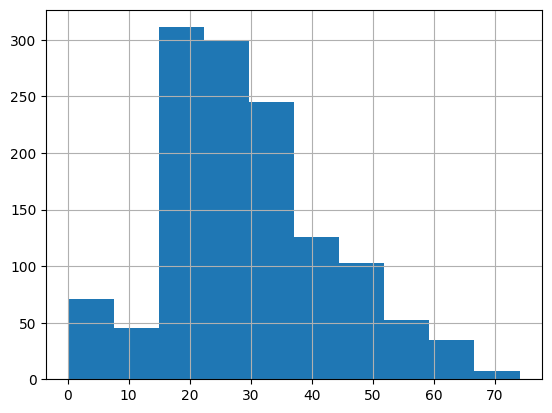

In [ ]:
#histograms

passengers.age.hist();

In [ ]:
#points of interest
def group_age(row):
  if row.age<=12:
    return 'child'
  elif row.age>12 and row.age<20:
    return 'teen'
  elif row.age>19 and row.age<30:
    return 'young_adult'
  elif row.age>29 and row.age<60:
    return 'adult'
  elif row.age>59:
    return 'senior'
  else:
    return 'unknown'

passengers['age_cat']=passengers.apply(group_age,axis=1)
passengers['age_cat'].value_counts()

adult          526
young_adult    457
teen           166
child          103
senior          42
Name: age_cat, dtype: int64

In [ ]:
passengers.groupby(['age_cat','survived'])['survived'].count()

age_cat      survived
adult        0           319
             1           207
child        0            46
             1            57
senior       0            31
             1            11
teen         0           108
             1            58
young_adult  0           298
             1           159
Name: survived, dtype: int64

In [ ]:
passengers.groupby(['age_cat','pclass','survived'])['survived'].count()

age_cat      pclass  survived
adult        1       0            88
                     1           128
             2       0            78
                     1            43
             3       0           153
                     1            36
child        1       0             1
                     1             4
             2       1            23
             3       0            45
                     1            30
senior       1       0            16
                     1             8
             2       0             7
                     1             2
             3       0             8
                     1             1
teen         1       0             4
                     1            16
             2       0            15
                     1            11
             3       0            89
                     1            31
young_adult  1       0            16
                     1            43
             2       0            60
        

In [ ]:
passengers.groupby(['age_cat','sex','survived'])['survived'].count()

age_cat      sex     survived
adult        female  0            38
                     1           141
             male    0           281
                     1            66
child        female  0            21
                     1            28
             male    0            25
                     1            29
senior       female  0             4
                     1             9
             male    0            27
                     1             2
teen         female  0            16
                     1            50
             male    0            92
                     1             8
young_adult  female  0            44
                     1           104
             male    0           254
                     1            55
Name: survived, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

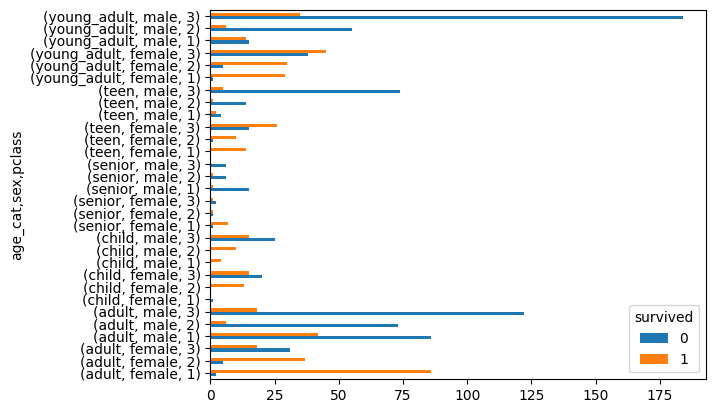

In [ ]:
import matplotlib.pyplot as plt

passengers.groupby(['age_cat','sex','pclass','survived'])['survived'].count().unstack().plot.barh()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

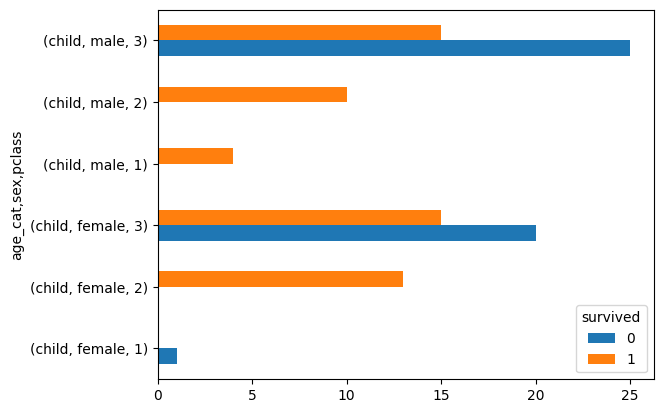

In [ ]:
import matplotlib.pyplot as plt

passengers[passengers['age_cat']=='child'].groupby(['age_cat','sex','pclass','survived'])['survived'].count().unstack().plot.barh()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

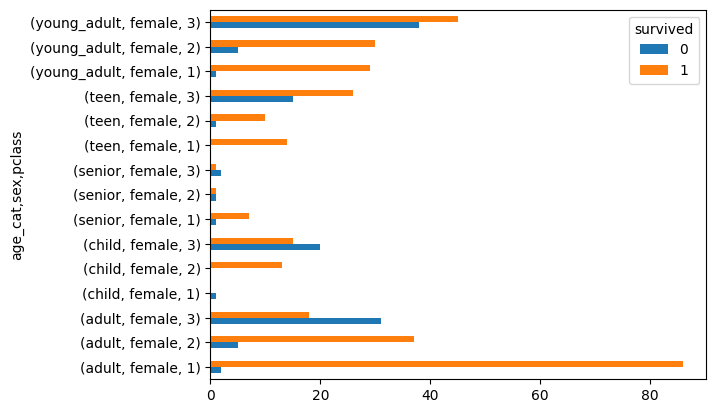

In [ ]:
import matplotlib.pyplot as plt

passengers[passengers['sex']=='female'].groupby(['age_cat','sex','pclass','survived'])['survived'].count().unstack().plot.barh()
plt.tight_layout

Text(0.5, 1.0, 'Survived')

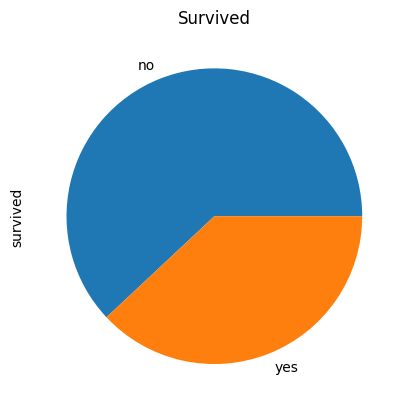

In [ ]:
# check dependent variable

passengers['survived'].value_counts().plot(kind='pie',labels=['no','yes'])
plt.title('Survived')

In [ ]:
# %cd /content
# passengers.to_csv('titanic_project.csv',index=False)

/content


In [ ]:
# %cd /content

# %cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

/content


## Part 4 - Feature Engineering and Feature Selection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks
%cp titanic_project.csv /content

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd

passengers=pd.read_csv('titanic_project.csv')
print(passengers.shape)
print(passengers.info())
passengers.head()

(1294, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1294 non-null   object 
 1   age           1294 non-null   float64
 2   hometown      1257 non-null   object 
 3   boarded       1294 non-null   object 
 4   destination   1294 non-null   object 
 5   lifeboat      495 non-null    object 
 6   body          133 non-null    object 
 7   pclass        1294 non-null   int64  
 8   survived      1294 non-null   int64  
 9   home country  695 non-null    object 
 10  surname       1293 non-null   object 
 11  title         1293 non-null   object 
 12  fmname        1293 non-null   object 
 13  sex           1294 non-null   object 
 14  age_cat       1294 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 151.8+ KB
None


,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex,age_cat
0,"Allen, Miss Elizabeth Walton",29.0,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN,Allen,Miss,Elizabeth Walton,female,young_adult
1,"Allison, Mr. Hudson Creighton",30.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN,Allison,Mr.,Hudson Creighton,male,adult
2,"and chauffeur, Mr. George Swane[71]",19.0,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN,and chauffeur,Mr.,George Swane[71],male,teen
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18.0,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",female,teen
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),female,young_adult


In [ ]:
passengers.boarded.value_counts()

Southampton    905
Cherbourg      258
Queenstown     120
Belfast         10
Southampson      1
Name: boarded, dtype: int64

In [ ]:
passengers.where(passengers=='Southampson').dropna(how='all').dropna(axis=1)

,boarded
757,Southampson


In [ ]:
passengers.loc[757,'boarded']='Southampton'

In [ ]:
# sex bi-label mapping
bi_labels=[]
for feat in passengers.drop('survived',axis=1).columns.sort_values():
  if (len(passengers[feat].dropna().unique())<3):
    print(passengers[feat].value_counts())
    bi_labels.append(feat)

print(bi_labels)

male      839
female    455
Name: sex, dtype: int64
['sex']


In [ ]:
# bi label mapping
for feat in bi_labels:
  bi0=passengers[feat].value_counts().index[0]
  bi1=passengers[feat].value_counts().index[1]
  passengers[feat]=passengers[feat].map({bi0:0,bi1:1})

passengers.head()

,name,age,hometown,boarded,destination,lifeboat,body,pclass,survived,home country,surname,title,fmname,sex,age_cat
0,"Allen, Miss Elizabeth Walton",29.0,"St Louis, Missouri, US",Southampton,St Louis,NaN,NaN,1,1,NaN,Allen,Miss,Elizabeth Walton,1,young_adult
1,"Allison, Mr. Hudson Creighton",30.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,135MB,1,0,NaN,Allison,Mr.,Hudson Creighton,0,adult
2,"and chauffeur, Mr. George Swane[71]",19.0,NaN,Southampton,"Montreal, Quebec, Canada",NaN,294MB,1,0,NaN,and chauffeur,Mr.,George Swane[71],0,teen
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18.0,"London, England, UK",Southampton,"Montreal, Quebec, Canada",11,NaN,1,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",1,teen
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25.0,"Montreal, Quebec, Canada",Southampton,"Montreal, Quebec, Canada",NaN,NaN,1,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),1,young_adult


In [ ]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder(categories='auto',drop='first',sparse_output=False,handle_unknown='ignore')

cat_features=['pclass','boarded']
ohe_df=ohe.fit_transform(passengers[cat_features])
ohe_df=pd.DataFrame(ohe_df,columns=ohe.get_feature_names_out(cat_features))
ohe_df.index=passengers.index
passengers=passengers.join(ohe_df)
passengers.drop(cat_features,axis=1,inplace=True)

passengers.head()

,name,age,hometown,destination,lifeboat,body,survived,home country,surname,title,fmname,sex,age_cat,pclass_2,pclass_3,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton
0,"Allen, Miss Elizabeth Walton",29.0,"St Louis, Missouri, US",St Louis,NaN,NaN,1,NaN,Allen,Miss,Elizabeth Walton,1,young_adult,0.0,0.0,0.0,0.0,1.0
1,"Allison, Mr. Hudson Creighton",30.0,"Montreal, Quebec, Canada","Montreal, Quebec, Canada",NaN,135MB,0,NaN,Allison,Mr.,Hudson Creighton,0,adult,0.0,0.0,0.0,0.0,1.0
2,"and chauffeur, Mr. George Swane[71]",19.0,NaN,"Montreal, Quebec, Canada",NaN,294MB,0,NaN,and chauffeur,Mr.,George Swane[71],0,teen,0.0,0.0,0.0,0.0,1.0
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18.0,"London, England, UK","Montreal, Quebec, Canada",11,NaN,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",1,teen,0.0,0.0,0.0,0.0,1.0
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25.0,"Montreal, Quebec, Canada","Montreal, Quebec, Canada",NaN,NaN,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),1,young_adult,0.0,0.0,0.0,0.0,1.0


In [ ]:
#age_cat frequency encoding

freq_feats=['age_cat','destination']
for feat in freq_feats:
  freq=passengers.groupby(feat).size()/len(passengers)
  passengers[feat+'_freq']=passengers.loc[:,feat].map(freq)

passengers.head()

,name,age,hometown,destination,lifeboat,body,survived,home country,surname,title,fmname,sex,age_cat,pclass_2,pclass_3,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton,age_cat_freq,destination_freq
0,"Allen, Miss Elizabeth Walton",29.0,"St Louis, Missouri, US",St Louis,NaN,NaN,1,NaN,Allen,Miss,Elizabeth Walton,1,young_adult,0.0,0.0,0.0,0.0,1.0,0.353168,0.000773
1,"Allison, Mr. Hudson Creighton",30.0,"Montreal, Quebec, Canada","Montreal, Quebec, Canada",NaN,135MB,0,NaN,Allison,Mr.,Hudson Creighton,0,adult,0.0,0.0,0.0,0.0,1.0,0.406491,0.028594
2,"and chauffeur, Mr. George Swane[71]",19.0,NaN,"Montreal, Quebec, Canada",NaN,294MB,0,NaN,and chauffeur,Mr.,George Swane[71],0,teen,0.0,0.0,0.0,0.0,1.0,0.128284,0.028594
3,"and cook, Miss Amelia Mary ""Mildred"" Brown[71]",18.0,"London, England, UK","Montreal, Quebec, Canada",11,NaN,1,NaN,and cook,Miss,"Amelia Mary ""Mildred"" Brown[71]",1,teen,0.0,0.0,0.0,0.0,1.0,0.128284,0.028594
4,"Allison, Mrs. Bessie Waldo (née Daniels)",25.0,"Montreal, Quebec, Canada","Montreal, Quebec, Canada",NaN,NaN,0,NaN,Allison,Mrs.,Bessie Waldo (née Daniels),1,young_adult,0.0,0.0,0.0,0.0,1.0,0.353168,0.028594


In [ ]:
# list features again
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1294 non-null   object 
 1   age                  1294 non-null   float64
 2   hometown             1257 non-null   object 
 3   destination          1294 non-null   object 
 4   lifeboat             495 non-null    object 
 5   body                 133 non-null    object 
 6   survived             1294 non-null   int64  
 7   home country         695 non-null    object 
 8   surname              1293 non-null   object 
 9   title                1293 non-null   object 
 10  fmname               1293 non-null   object 
 11  sex                  1294 non-null   int64  
 12  age_cat              1294 non-null   object 
 13  pclass_2             1294 non-null   float64
 14  pclass_3             1294 non-null   float64
 15  boarded_Cherbourg    1294 non-null   f

In [ ]:
#variables to keep
keep_features = ['boarded_Cherbourg', 'boarded_Queenstown', 'boarded_Southampton',
                 'destination_freq', 'survived', 'sex', 'age_cat_freq',
                 'pclass_2', 'pclass_3']

df=passengers[keep_features]
print(df.shape)
print(df.info())
df.head()

(1294, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   boarded_Cherbourg    1294 non-null   float64
 1   boarded_Queenstown   1294 non-null   float64
 2   boarded_Southampton  1294 non-null   float64
 3   destination_freq     1294 non-null   float64
 4   survived             1294 non-null   int64  
 5   sex                  1294 non-null   int64  
 6   age_cat_freq         1294 non-null   float64
 7   pclass_2             1294 non-null   float64
 8   pclass_3             1294 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 91.1 KB
None


,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton,destination_freq,survived,sex,age_cat_freq,pclass_2,pclass_3
0,0.0,0.0,1.0,0.000773,1,1,0.353168,0.0,0.0
1,0.0,0.0,1.0,0.028594,0,0,0.406491,0.0,0.0
2,0.0,0.0,1.0,0.028594,0,0,0.128284,0.0,0.0
3,0.0,0.0,1.0,0.028594,1,1,0.128284,0.0,0.0
4,0.0,0.0,1.0,0.028594,0,1,0.353168,0.0,0.0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(['survived'],axis=1),
    df['survived'],
    test_size=0.25,
    random_state=42)

print(X_train.shape)
print(X_train.shape)
X_train.head()

(970, 13)
(970, 13)


,name,age,hometown,boarded,destination,lifeboat,body,pclass,surname,title,fmname,sex,age_cat
398,"Doling, Miss Elsie",19.0,"Southampton, Hampshire, England, UK",Southampton,New York City,?,NaN,2,Doling,Miss,Elsie,female,teen
266,"Snyder, Mrs. Nellie (née Stevenson)",23.0,"Minneapolis, Minnesota, US",Southampton,"Minneapolis, Minnesota, US",7,NaN,1,Snyder,Mrs.,Nellie (née Stevenson),female,young_adult
344,"Bentham, Miss Lillian W.",19.0,"Rochester, New York, US",Southampton,"Rochester, New York, US",12,NaN,2,Bentham,Miss,Lillian W.,female,teen
59,"and maid, Miss Auguste Serreplan",30.0,"Bryn Mawr, Pennsylvania, US",Southampton,"Bryn Mawr, Pennsylvania, US",4,NaN,1,and maid,Miss,Auguste Serreplan,female,adult
560,"Slemen, Mr. Richard James",35.0,"Landrake, Cornwall, England",Southampton,"Nashua, New Hampshire, US",NaN,NaN,2,Slemen,Mr.,Richard James,male,adult


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selections=VarianceThreshold(threshold=0.2)
selections.fit(X_train)
X_train.columns.values[selections.get_support()]

array(['boarded_Southampton', 'sex', 'pclass_3'], dtype=object)

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

selections=SelectKBest(f_classif,k=4)
selections.fit(X_train,y_train)
X_train.columns.values[selections.get_support()]

array(['boarded_Cherbourg', 'boarded_Southampton', 'sex', 'pclass_3'],
      dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

selections=SelectFromModel(estimator=LogisticRegression(solver='liblinear')).fit(X_train,y_train)
X_train.columns.values[selections.get_support()]

array(['sex', 'pclass_3'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

selections=RFE(estimator=LogisticRegression(solver='liblinear'),n_features_to_select=4).fit(X_train,y_train)
X_train.columns.values[selections.get_support()]

array(['sex', 'age_cat_freq', 'pclass_2', 'pclass_3'], dtype=object)

In [ ]:
# %cd /content
# passengers.to_csv('titanic_project.csv',index=False)

/content


In [ ]:
# %cd /content

# %cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

/content


##Part 5 - Modeling and Evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

%cp titanic_final.csv /content/drive/MyDrive/Colab\ Notebooks
%cp titanic_percentages.csv /content/drive/MyDrive/Colab\ Notebooks
%cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

cp: 'titanic_final.csv' and '/content/drive/MyDrive/Colab Notebooks/titanic_final.csv' are the same file
cp: 'titanic_percentages.csv' and '/content/drive/MyDrive/Colab Notebooks/titanic_percentages.csv' are the same file
cp: 'titanic_project.csv' and '/content/drive/MyDrive/Colab Notebooks/titanic_project.csv' are the same file


In [ ]:
import pandas as pd

df=pd.read_csv('titanic_final.csv')
print(df.shape)
print(df.info())
df.head()

(1294, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   boarded_Cherbourg    1294 non-null   float64
 1   boarded_Queenstown   1294 non-null   float64
 2   boarded_Southampton  1294 non-null   float64
 3   destination_freq     1294 non-null   float64
 4   survived             1294 non-null   int64  
 5   sex                  1294 non-null   int64  
 6   age_cat_freq         1294 non-null   float64
 7   pclass_2             1294 non-null   float64
 8   pclass_3             1294 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 91.1 KB
None


,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton,destination_freq,survived,sex,age_cat_freq,pclass_2,pclass_3
0,0.0,0.0,1.0,0.000773,1,1,0.353168,0.0,0.0
1,0.0,0.0,1.0,0.028594,0,0,0.406491,0.0,0.0
2,0.0,0.0,1.0,0.028594,0,0,0.128284,0.0,0.0
3,0.0,0.0,1.0,0.028594,1,1,0.128284,0.0,0.0
4,0.0,0.0,1.0,0.028594,0,1,0.353168,0.0,0.0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(['survived'],axis=1),
    df['survived'],
    test_size=0.25,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)
X_train.head()

(970, 8)
(324, 8)


,boarded_Cherbourg,boarded_Queenstown,boarded_Southampton,destination_freq,sex,age_cat_freq,pclass_2,pclass_3
398,0.0,0.0,1.0,0.272025,1,0.128284,1.0,0.0
266,0.0,0.0,1.0,0.008501,1,0.353168,0.0,0.0
344,0.0,0.0,1.0,0.004637,1,0.128284,1.0,0.0
59,0.0,0.0,1.0,0.005410,1,0.406491,0.0,0.0
560,0.0,0.0,1.0,0.000773,0,0.406491,1.0,0.0


In [ ]:
#sklearn feature selection SequentialFeatureSelector
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import linear_model

sfs=SequentialFeatureSelector(linear_model.LogisticRegression(),
                              n_features_to_select='auto',
                              direction='backward',
                              scoring='roc_auc',
                              tol=-0.01,
                              cv=5)

selected_features=sfs.fit(X_train,y_train)
print(selected_features.get_feature_names_out())

['sex' 'pclass_3']


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

hyperparameters = {
            'penalty': ['l2', 'l1', 'elasticnet'],
            'C': np.logspace(-4, 4, 10),
            'fit_intercept': [True, False],
            'class_weight': ['balanced', 'None'],
            'solver': ['lbfgs', 'liblinear', 'newton-cholesky']
            }

grid_search=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=hyperparameters,
                         scoring='accuracy',
                         cv=10)

grid_search=grid_search.fit(X_train[selected_features.get_feature_names_out()],y_train)

best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

print('accuracy: ',best_accuracy)
print('params: ',best_parameters)

accuracy:  0.7896907216494845
params:  {'C': 0.0001, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
#evaluate
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

model=LogisticRegression().set_params(**best_parameters)
model.fit(X_train[selected_features.get_feature_names_out()],y_train)
predictions=model.predict(X_test[selected_features.get_feature_names_out()])
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.7561728395061729
[[171  39]
 [ 40  74]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       210
           1       0.65      0.65      0.65       114

    accuracy                           0.76       324
   macro avg       0.73      0.73      0.73       324
weighted avg       0.76      0.76      0.76       324



In [ ]:
import pandas as pd

temp=pd.read_csv('titanic_percentages.csv')
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         1294 non-null   object 
 1   age          1294 non-null   float64
 2   hometown     1257 non-null   object 
 3   boarded      1294 non-null   object 
 4   destination  1294 non-null   object 
 5   lifeboat     495 non-null    object 
 6   body         133 non-null    object 
 7   pclass       1294 non-null   int64  
 8   survived     1294 non-null   int64  
 9   surname      1293 non-null   object 
 10  title        1293 non-null   object 
 11  fmname       1293 non-null   object 
 12  sex          1294 non-null   object 
 13  age_cat      1294 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 141.7+ KB
None


In [ ]:
percentages=temp.groupby(['age_cat','sex','pclass'])['survived'].agg(['sum','count','mean'])
percentages

sum  count      mean
age_cat     sex    pclass                      
adult       female 1        86     88  0.977273
                   2        37     42  0.880952
                   3        18     49  0.367347
            male   1        42    128  0.328125
                   2         6     79  0.075949
                   3        18    140  0.128571
child       female 1         0      1  0.000000
                   2        13     13  1.000000
                   3        15     35  0.428571
            male   1         4      4  1.000000
                   2        10     10  1.000000
                   3        15     40  0.375000
senior      female 1         7      8  0.875000
                   2         1      2  0.500000
                   3         1      3  0.333333
            male   1         1     16  0.062500
                   2         1      7  0.142857
                   3         0      6  0.000000
teen        female 1        14     14  1.000000
                   2        10     11  0.909091
                   3        26     41  0.634146
            male   1         2      6  0.333333
                   2         1     15  0.066667
                   3         5     79  0.063291
young_adult female 1        29     30  0.966667
                   2        30     35  0.857143
                   3        45     83  0.542169
            male   1        14     29  0.482759
                   2         6     61  0.098361
                   3        35    219  0.159817

In [ ]:
# %cd /content
# passengers.to_csv('titanic_project.csv',index=False)

/content


In [ ]:
# %cd /content

# %cp titanic_project.csv /content/drive/MyDrive/Colab\ Notebooks

/content


##Part 6 - Transformers and XGBoost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks
%cp titanic_percentages.csv /content/
%cd /content

/content/drive/MyDrive/Colab Notebooks
/content


In [ ]:
#dataframe and train test split
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv('titanic_percentages.csv')

X_train,X_test,y_train,y_test=train_test_split(
    df.drop(['survived'],axis=1),
    df['survived'],
    test_size=0.25,
    random_state=42
)

print(X_train.shape)
print(X_test.shape)
X_train.head()

(970, 13)
(324, 13)


,name,age,hometown,boarded,destination,lifeboat,body,pclass,surname,title,fmname,sex,age_cat
398,"Doling, Miss Elsie",19.0,"Southampton, Hampshire, England, UK",Southampton,New York City,?,NaN,2,Doling,Miss,Elsie,female,teen
266,"Snyder, Mrs. Nellie (née Stevenson)",23.0,"Minneapolis, Minnesota, US",Southampton,"Minneapolis, Minnesota, US",7,NaN,1,Snyder,Mrs.,Nellie (née Stevenson),female,young_adult
344,"Bentham, Miss Lillian W.",19.0,"Rochester, New York, US",Southampton,"Rochester, New York, US",12,NaN,2,Bentham,Miss,Lillian W.,female,teen
59,"and maid, Miss Auguste Serreplan",30.0,"Bryn Mawr, Pennsylvania, US",Southampton,"Bryn Mawr, Pennsylvania, US",4,NaN,1,and maid,Miss,Auguste Serreplan,female,adult
560,"Slemen, Mr. Richard James",35.0,"Landrake, Cornwall, England",Southampton,"Nashua, New Hampshire, US",NaN,NaN,2,Slemen,Mr.,Richard James,male,adult


In [ ]:
import numpy as np
from typing import List
from tqdm import tqdm
from transformers import AutoTokenizer,AutoModel
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

tokenizer=AutoTokenizer.from_pretrained('distilbert-base-uncased')
model=AutoModel.from_pretrained('distilbert-base-uncased')

def extract(texts:List[str])->np.array:
  feats=np.zeros((len(texts),768),dtype=np.float16)
  for itt,text in enumerate(tqdm(texts)):
    tokenized_text=tokenizer(text,return_tensors='pt')
    model_output=model(**tokenized_text)[0].detach()
    feats[itt,:]=model_output.numpy().mean(axis=1)
  return feats

def make_text(row):
  texts.append(' '.join(row.to_string(index=False).split()))

scaler=StandardScaler()
classifier=XGBClassifier(use_labels_encoder=False)

train_targets=[target for target in y_train]
texts=[]
X_train.apply(make_text,axis=1)
train_features=scaler.fit_transform(extract(texts))
classifier.fit(train_features,train_targets)

test_targets=[target for target in y_test]
texts=[]
X_test.apply(make_text,axis=1)
predictions=classifier.predict(scaler.transform(extract(texts)))

print()
print(accuracy_score(test_targets,predictions))
print(confusion_matrix(test_targets,predictions))
print(classification_report(test_targets,predictions))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

100%|██████████| 324/324 [00:34<00:00,  9.30it/s]


0.8364197530864198
[[186  24]
 [ 29  85]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       210
           1       0.78      0.75      0.76       114

    accuracy                           0.84       324
   macro avg       0.82      0.82      0.82       324
weighted avg       0.84      0.84      0.84       324

